# Dependencies

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading Data

In [10]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# EDA

* DataFrame has:
    * 4 Numerical Columns
    * 3 Categorical Columns

* Shape : 7 Columns , 344 Rows

* Nan Values : 
    * species : 0
    * island : 0
    * culmen_length_mm : 2
    * culmen_depth_mm : 2
    * flipper_length_mm : 2
    * body_mass_g : 2
    * sex : 10

* Categorical Columns Values:
    * species : Adelie, Chinstrap, Gentoo
    * island : Torgersen, Biscoe, Dream
    * sex : MALE, FEMALE, nan, . (More investigations needed for this columsn)
        * There is one row containing "." (I am considering droping it.)
        * There are 10 columns with nan value, two of which only contain species and island data. (considering dropping these too.)
        
    


    


In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
df.shape

(344, 7)

In [17]:
df.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

In [19]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [21]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [23]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [20]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [57]:
index_to_drop = df[df['sex'].isna()].index.tolist()

In [58]:
index_to_drop

[3, 8, 9, 10, 11, 47, 246, 286, 324, 339]

In [34]:
df[df['sex'] == '.']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


## Data Cleaning

* After using `prepareing_data()`, we drop all the nan values of the categorical columns.

In [65]:
def preparing_data(df):
    index_to_drop = df[df['sex'].isna()].index.tolist()
    index_to_drop.extend(df[df['sex'] == '.'].index.tolist())
    clean_df = df.drop(index=index_to_drop, axis=0)

    return clean_df

In [66]:
clean_df = preparing_data(df)

In [68]:
clean_df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Data Anlaysis

In [105]:
culmen_depth_islands = df.groupby('island', as_index=False)['culmen_depth_mm'].mean()
culmen_depth_islands

,island,culmen_depth_mm
0,Biscoe,15.874850
1,Dream,18.344355
2,Torgersen,18.429412


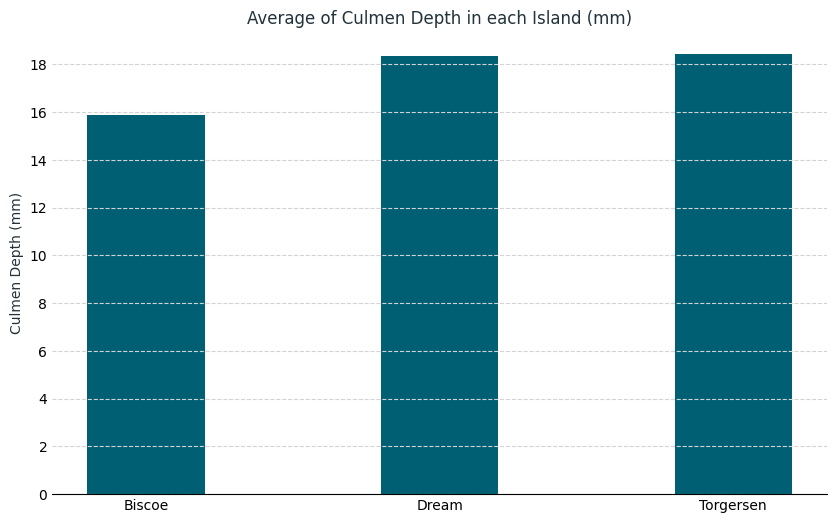

In [133]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(visible=True, axis='y', color='lightgray', ls='--')
ax.bar(culmen_depth_islands['island'], culmen_depth_islands['culmen_depth_mm'], color='#005f73', width=0.4)
ax.set_title('Average of Culmen Depth in each Island (mm)', fontsize=12, color='#22333b')
ax.set_ylabel('Culmen Depth (mm)', fontsize=10, color='#22333b')
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.tick_params(length=0)
ax.set_yticks(range(0, round(max(culmen_depth_islands['culmen_depth_mm'])) + 2, 2))
plt.show()

In [73]:
body_mass_sex = clean_df.groupby('sex', as_index=False)['body_mass_g'].mean()
body_mass_sex

,sex,body_mass_g
0,FEMALE,3862.272727
1,MALE,4545.684524


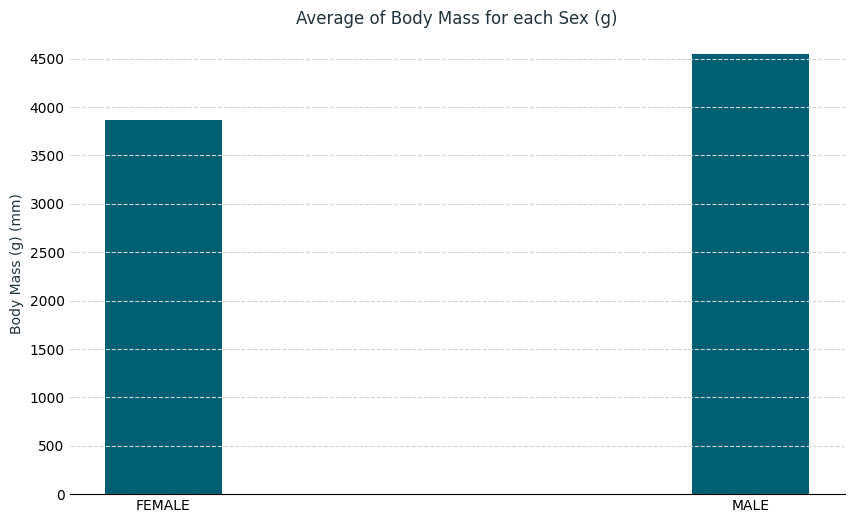

In [139]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(visible=True, axis='y', color='lightgray', ls='--')
ax.bar(body_mass_sex['sex'], body_mass_sex['body_mass_g'], color='#005f73', width=0.2)
ax.set_title('Average of Body Mass for each Sex (g)', fontsize=12, color='#22333b')
ax.set_ylabel('Body Mass (g) (mm)', fontsize=10, color='#22333b')
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.tick_params(length=0)
ax.set_yticks(range(0, round(max(body_mass_sex['body_mass_g'])), 500))
plt.show()

In [144]:
species_islands = clean_df.groupby( ['species','island']).agg({'species': 'count'})
species_islands

species
species   island            
Adelie    Biscoe          44
          Dream           55
          Torgersen       47
Chinstrap Dream           68
Gentoo    Biscoe         119

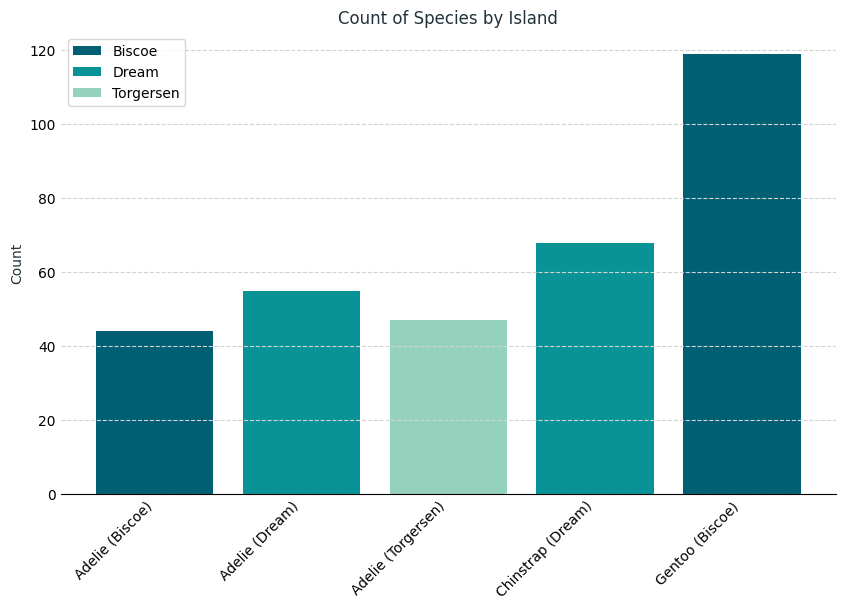

In [164]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(visible=True, axis='y', color='lightgray', ls='--')

island_colors = {'Biscoe': '#005f73', 'Dream': '#0a9396', 'Torgersen': '#94d2bd'}

species_labels = species_islands.index.get_level_values(0)
island_labels = species_islands.index.get_level_values(1)

for i, ((species, island), row) in enumerate(species_islands.iterrows()):
    ax.bar(f'{species} ({island})', row['species'], color=island_colors.get(island, '#000000'))

ax.set_title('Count of Species by Island', fontsize=12, color='#22333b')
ax.set_ylabel('Count', fontsize=10, color='#22333b')
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.tick_params(length=0)
ax.set_xticks(range(len(species_islands)))
ax.set_xticklabels([f'{species} ({island})' for species, island in species_islands.index], rotation=45, ha='right')
plt.legend(island_labels.unique())
plt.show()